The Rober equations are a set of equations from chemistry that are very stiff:

- https://docs.sciml.ai/dev/tutorials/advanced_ode_example/#Declaring-Jacobian-Functions-1

---

## Model (DiffEq)

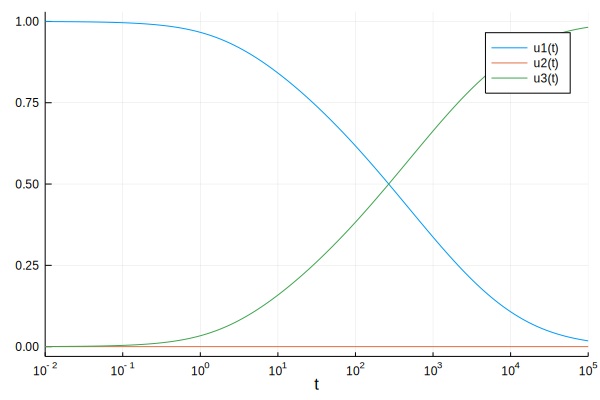

In [2]:
using DifferentialEquations, Plots

function rober(du,u,p,t)
  y₁,y₂,y₃ = u
  k₁,k₂,k₃ = p
  du[1] = -k₁*y₁+k₃*y₂*y₃
  du[2] =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  du[3] =  k₂*y₂^2
  nothing
end
prob = ODEProblem(rober,[1.0,0.0,0.0],(0.0,1e5),(0.04,3e7,1e4))
sol = solve(prob)
plot(sol,tspan=(1e-2,1e5),xscale=:log10)

## Model (RA)

In [3]:
using ReachabilityAnalysis, Plots

@taylorize function rober!(du, u, p, t)
  local k₁ = 0.04
  local k₂ = 3e7
  local k₃ = 1e4
    
  du[1] = -k₁*u[1] + k₃ * (u[2]*u[3])
  du[2] =  k₁*u[1] - k₂*u[2]^2 - k₃*(u[2]*u[3])
  du[3] =  k₂*u[2]^2
end

prob = @ivp(x' = rober!(x), dim=3, x(0) ∈ [1.0, 0.0, 0.0]);

┌ Info: Precompiling ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1260


In [4]:
sol = ReachabilityAnalysis.solve(prob, tspan=(1e-2, 10.0));

MethodError: MethodError: no method matching box_approximation(::Array{Float64,1})
Closest candidates are:
  box_approximation(!Matched::LazySet{N}) where N<:Real at /home/mforets/.julia/dev/LazySets/src/Approximations/box_approximations.jl:19

In [5]:
prob = @ivp(x' = rober!(x), dim=3, x(0) ∈ Singleton([1.0, 0.0, 0.0]));

In [20]:
sol = ReachabilityAnalysis.solve(prob, tspan=(1e-2, 10_000.0), TMJets(abs_tol=1e-29, max_steps=10_000));

┌ Warning: Maximum number of integration steps reached; exiting.
└ @ ReachabilityAnalysis /home/mforets/.julia/dev/ReachabilityAnalysis/src/Algorithms/TMJets/validated_integ.jl:518


In [23]:
sol = overapproximate(sol, Zonotope);
tspan(sol)

Interval(0.01, 0.3163068965754427)

In [24]:
plot(sol[1:10_000], vars=(0, 2))

In [6]:
plot(sol,tspan=(1e-2,1e5),xscale=:log10)

InterruptException: InterruptException:

In [ ]:
(0.0,1e5)

## Reachability settings

## Results